In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from lmfit import Model
from lmfit.models import GaussianModel, LinearModel
from lmfit import Model

In [2]:
bbdt = np.genfromtxt('bbdt-lambda.txt', delimiter='\n')
lwtnn = np.genfromtxt('lwtnn-lambda.txt', delimiter='\n')
pn = np.genfromtxt('pn-lambda.txt', delimiter='\n')

In [3]:
def transf(data):
    y,b=np.histogram(data,bins=100)
    x=b[:-1]+(b[1:]-b[:-1])/2
    return x,y

x_bbdt , y_bbdt = transf(bbdt)
x_lwtnn , y_lwtnn = transf(lwtnn)
x_pn , y_pn = transf(pn)

In [4]:
peak = GaussianModel()
offset = LinearModel()
mod = peak + offset
pars = offset.guess(y_bbdt, x=x_bbdt)
pars += peak.guess(y_bbdt, x=x_bbdt)
result_bbdt = mod.fit(y_bbdt,pars, x=x_bbdt)

peak = GaussianModel()
offset = LinearModel()
mod = peak + offset
pars = offset.guess(y_lwtnn, x=x_lwtnn)
pars += peak.guess(y_lwtnn, x=x_lwtnn)
result_lwtnn = mod.fit(y_lwtnn,pars, x=x_lwtnn)

peak = GaussianModel()
offset = LinearModel()
mod = peak + offset
pars = offset.guess(y_pn, x=x_pn)
pars += peak.guess(y_pn, x=x_pn)
result_pn = mod.fit(y_pn,pars, x=x_pn)

print('/////////////////////////////\n BBDT\n/////////////////////////////\n')
print(result_bbdt.fit_report())
print('/////////////////////////////\n LWTNN\n/////////////////////////////\n')
print(result_lwtnn.fit_report())
print('/////////////////////////////\n PNowak\n/////////////////////////////\n')
print(result_pn.fit_report())

comps_bbdt = result_bbdt.eval_components()
comps_lwtnn = result_lwtnn.eval_components()
comps_pn = result_pn.eval_components()

/////////////////////////////
 BBDT
/////////////////////////////

[[Model]]
    (Model(gaussian) + Model(linear))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 100
    # variables        = 5
    chi-square         = 5592.88216
    reduced chi-square = 58.8724438
    Akaike info crit   = 412.407984
    Bayesian info crit = 425.433835
[[Variables]]
    intercept: -743.671385 +/- 59.3582317 (7.98%) (init = -749.3484)
    slope:      0.70606800 +/- 0.05323436 (7.54%) (init = 0.7151375)
    amplitude:  221.689698 +/- 15.8945612 (7.17%) (init = 490.3038)
    sigma:      1.37757023 +/- 0.10833268 (7.86%) (init = 1.4994)
    center:     1115.42560 +/- 0.10545192 (0.01%) (init = 1115.75)
    fwhm:       3.24392993 +/- 0.25510396 (7.86%) == '2.3548200*sigma'
    height:     64.2010084 +/- 4.29256274 (6.69%) == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(intercept, slope) = -1.000

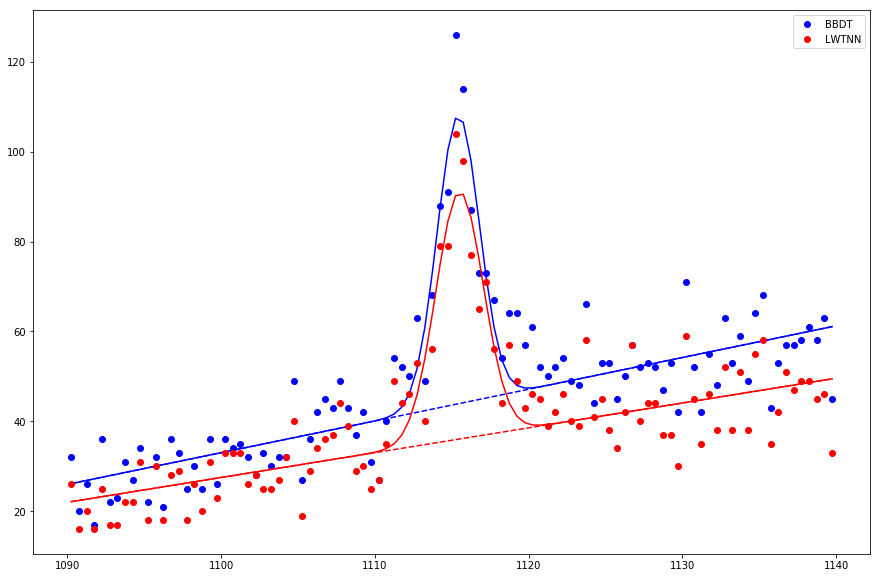

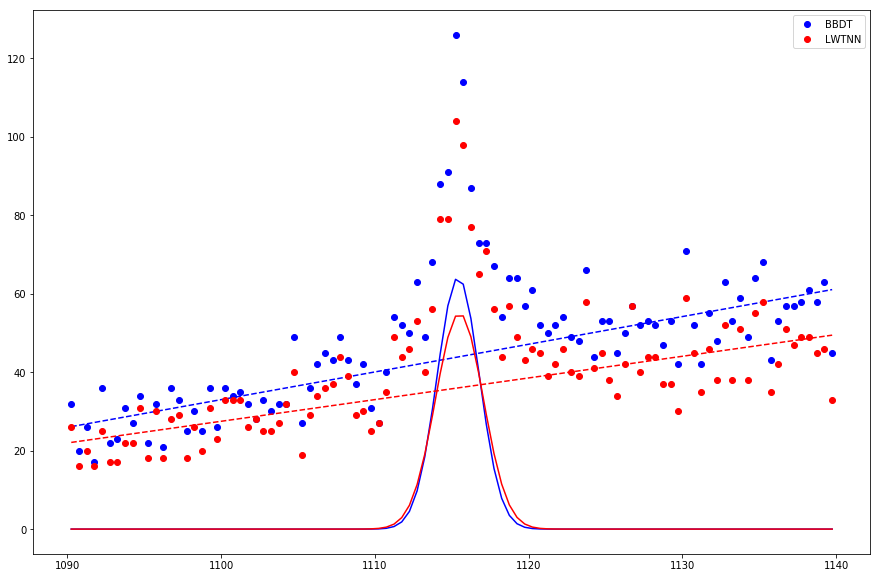

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(x_bbdt, y_bbdt, 'bo', label='BBDT')
plt.plot(x_bbdt, result_bbdt.best_fit, 'b-')
plt.plot(x_bbdt, comps_bbdt['linear'], 'b--')
plt.plot(x_lwtnn, y_lwtnn, 'ro', label='LWTNN')
plt.plot(x_lwtnn, result_lwtnn.best_fit, 'r-')
plt.plot(x_lwtnn, comps_lwtnn['linear'], 'r--')
plt.legend()
plt.figure(figsize=(15, 10))
plt.plot(x_bbdt, y_bbdt, 'bo', label='BBDT')
plt.plot(x_bbdt, comps_bbdt['gaussian'], 'b-')
plt.plot(x_bbdt, comps_bbdt['linear'], 'b--')
plt.plot(x_lwtnn, y_lwtnn, 'ro', label='LWTNN')
plt.plot(x_lwtnn, comps_lwtnn['gaussian'], 'r-')
plt.plot(x_lwtnn, comps_lwtnn['linear'], 'r--')
plt.legend()

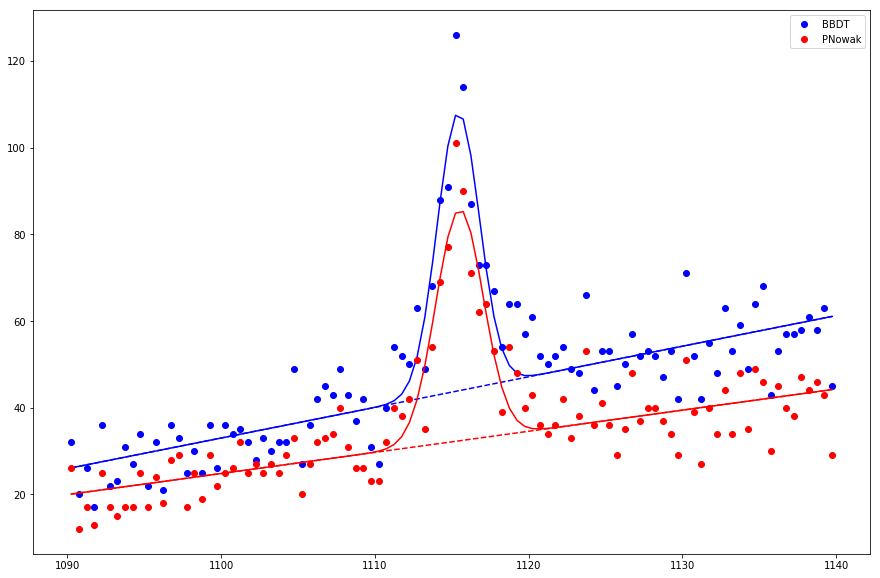

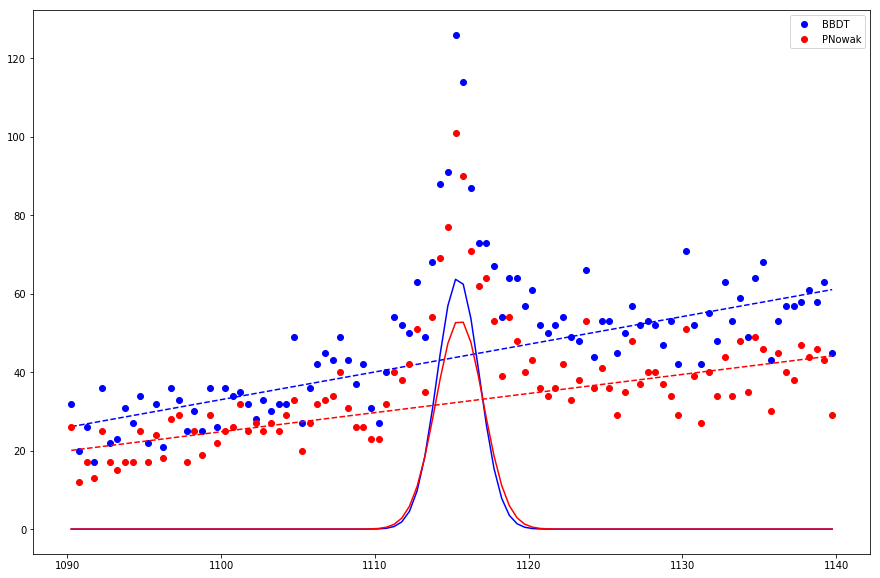

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(x_bbdt, y_bbdt, 'bo', label='BBDT')
plt.plot(x_bbdt, result_bbdt.best_fit, 'b-')
plt.plot(x_bbdt, comps_bbdt['linear'], 'b--')
plt.plot(x_pn, y_pn, 'ro', label='PNowak')
plt.plot(x_pn, result_pn.best_fit, 'r-')
plt.plot(x_pn, comps_pn['linear'], 'r--')
plt.legend()
plt.figure(figsize=(15, 10))
plt.plot(x_bbdt, y_bbdt, 'bo', label='BBDT')
plt.plot(x_bbdt, comps_bbdt['gaussian'], 'b-')
plt.plot(x_bbdt, comps_bbdt['linear'], 'b--')
plt.plot(x_pn, y_pn, 'ro', label='PNowak')
plt.plot(x_pn, comps_pn['gaussian'], 'r-')
plt.plot(x_pn, comps_pn['linear'], 'r--')
plt.legend()

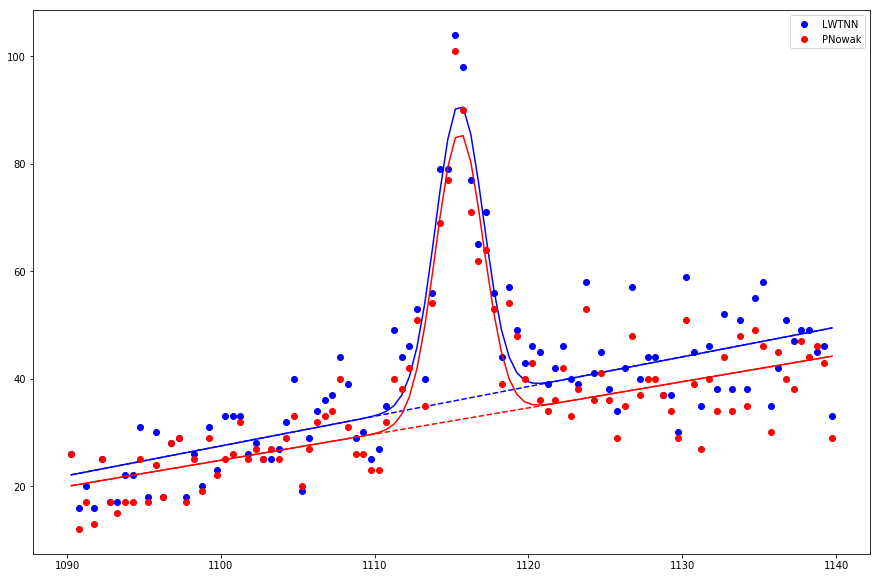

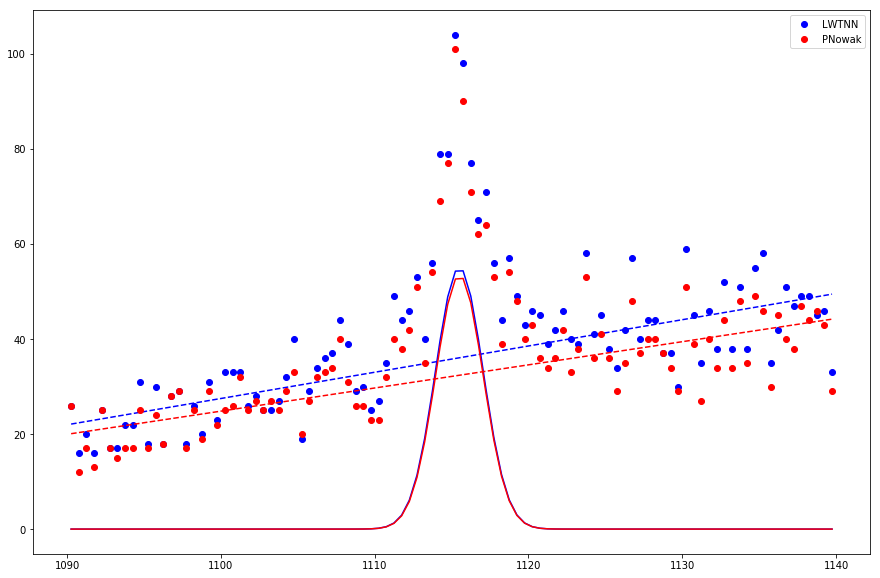

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(x_lwtnn, y_lwtnn, 'bo', label='LWTNN')
plt.plot(x_lwtnn, result_lwtnn.best_fit, 'b-')
plt.plot(x_lwtnn, comps_lwtnn['linear'], 'b--')
plt.plot(x_pn, y_pn, 'ro', label='PNowak')
plt.plot(x_pn, result_pn.best_fit, 'r-')
plt.plot(x_pn, comps_pn['linear'], 'r--')
plt.legend()
plt.figure(figsize=(15, 10))
plt.plot(x_lwtnn, y_lwtnn, 'bo', label='LWTNN')
plt.plot(x_lwtnn, comps_lwtnn['gaussian'], 'b-')
plt.plot(x_lwtnn, comps_lwtnn['linear'], 'b--')
plt.plot(x_pn, y_pn, 'ro', label='PNowak')
plt.plot(x_pn, comps_pn['gaussian'], 'r-')
plt.plot(x_pn, comps_pn['linear'], 'r--')
plt.legend()

In [8]:
lin_bbdt = np.sum(comps_bbdt['linear'])
gauss_bbdt = np.sum(comps_bbdt['gaussian'])
sum_bbdt = np.sum(y_bbdt)
gauss_peak_bbdt = result_bbdt.params['height'].value
lin_peak_bbdt = result_bbdt.params['slope'].value*result_bbdt.params['center'].value+result_bbdt.params['intercept'].value
peak_bbdt = gauss_peak_bbdt + lin_peak_bbdt

lin_lwtnn = np.sum(comps_lwtnn['linear'])
gauss_lwtnn = np.sum(comps_lwtnn['gaussian'])
sum_lwtnn = np.sum(y_lwtnn)
gauss_peak_lwtnn = result_lwtnn.params['height'].value
lin_peak_lwtnn = result_lwtnn.params['slope'].value*result_lwtnn.params['center'].value+result_lwtnn.params['intercept'].value
peak_lwtnn = gauss_peak_lwtnn + lin_peak_lwtnn

lin_pn = np.sum(comps_pn['linear'])
gauss_pn = np.sum(comps_pn['gaussian'])
sum_pn = np.sum(y_pn)
gauss_peak_pn = result_pn.params['height'].value
lin_peak_pn = result_pn.params['slope'].value*result_pn.params['center'].value+result_pn.params['intercept'].value
peak_pn = gauss_peak_pn + lin_peak_pn

In [9]:
print('\t\t\t\tBBDT\t\t\tLWTNN\t\t\tPNowak')
print('signal/noise ratio \t', gauss_bbdt/lin_bbdt, '\t', gauss_lwtnn/lin_lwtnn, '\t', gauss_pn/lin_pn)
print('signal/all ratio \t', gauss_bbdt/sum_bbdt, '\t', gauss_lwtnn/sum_lwtnn, '\t', gauss_pn/sum_pn)
print('peak signal/noise ratio\t', gauss_peak_bbdt/lin_peak_bbdt, '\t', gauss_peak_lwtnn/lin_peak_lwtnn, '\t', gauss_peak_pn/lin_peak_pn)
print('peak signal/all ratio \t', gauss_peak_bbdt/peak_bbdt, '\t', gauss_peak_lwtnn/peak_lwtnn, '\t', gauss_peak_pn/peak_pn)

				BBDT			LWTNN			PNowak
signal/noise ratio 	 0.10174620946279209 	 0.11956508492069724 	 0.12890402257702216
signal/all ratio 	 0.09234995191171827 	 0.10679601081797381 	 0.11418510342689266
peak signal/noise ratio	 1.4626062524725065 	 1.5264186279797656 	 1.6487420803630684
peak signal/all ratio 	 0.5939261508022324 	 0.6041827791621203 	 0.6224622973245745
